In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common.bar_plotter import BarPlotter
from common.outliers import find_outliers_in_two_columns, find_outliers_in_single_column

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [2]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx")

### Charts

Stats grouped by year of release

<AxesSubplot:xlabel='Year_of_Release'>

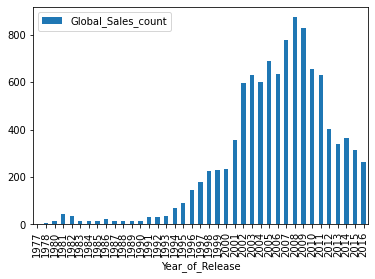

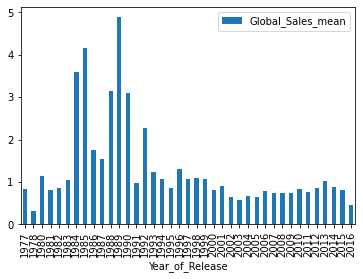

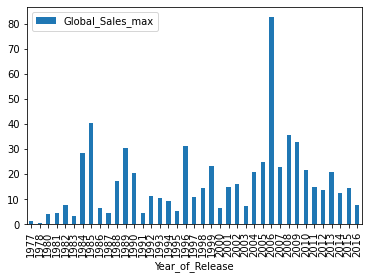

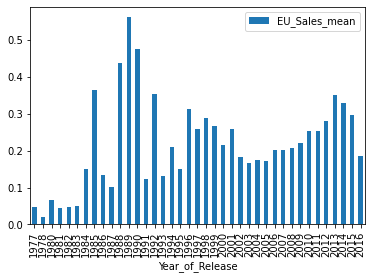

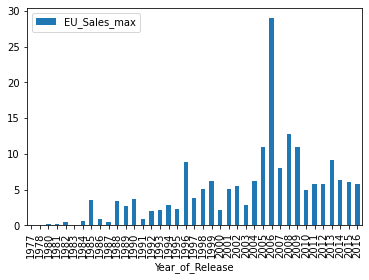

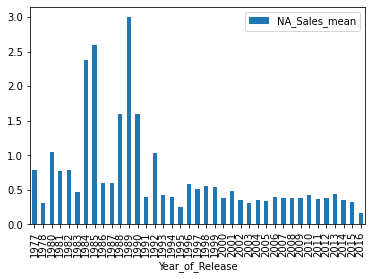

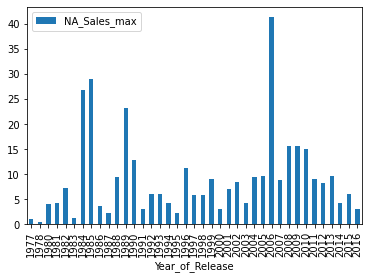

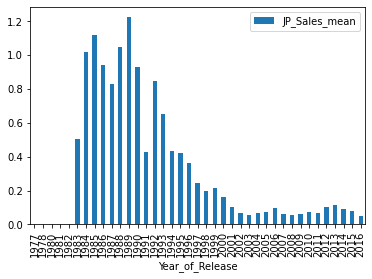

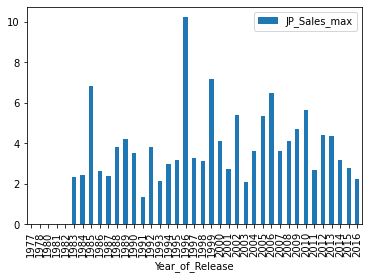

In [3]:
number_of_entries_by_years = data\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales"])\
    .groupby("Year_of_Release").agg(["mean", "count", "max"])
number_of_entries_by_years.columns = ['_'.join(col).strip()
                                      for col in number_of_entries_by_years.columns.values]

number_of_entries_by_years.plot.bar(y="Global_Sales_count")
number_of_entries_by_years.plot.bar(y="Global_Sales_mean")
number_of_entries_by_years.plot.bar(y="Global_Sales_max")

number_of_entries_by_years.plot.bar(y="EU_Sales_mean")
number_of_entries_by_years.plot.bar(y="EU_Sales_max")

number_of_entries_by_years.plot.bar(y="NA_Sales_mean")
number_of_entries_by_years.plot.bar(y="NA_Sales_max")

number_of_entries_by_years.plot.bar(y="JP_Sales_mean")
number_of_entries_by_years.plot.bar(y="JP_Sales_max")

Stats grouped by year of release and game title

<AxesSubplot:xlabel='Year_of_Release'>

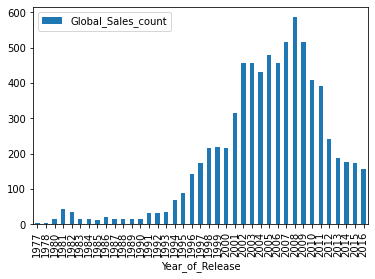

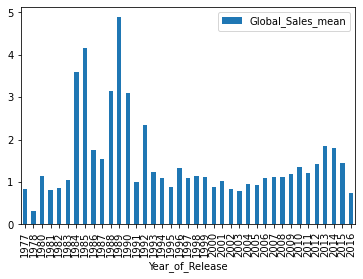

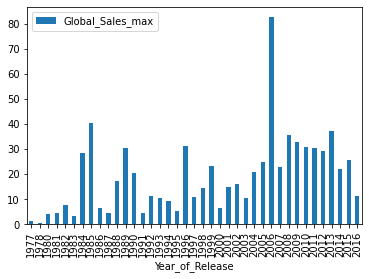

In [4]:
number_of_entries_by_years_and_titles = data.groupby(["Year_of_Release", "Name"]).sum()
number_of_entries_by_years_and_titles = number_of_entries_by_years_and_titles\
    .filter(["Year_of_Release", "Global_Sales"])\
    .groupby("Year_of_Release").agg(["mean", "count", "max"])
number_of_entries_by_years_and_titles.columns = ['_'.join(col).strip()
                                      for col in number_of_entries_by_years_and_titles.columns.values]

number_of_entries_by_years_and_titles.plot.bar(y="Global_Sales_count")
number_of_entries_by_years_and_titles.plot.bar(y="Global_Sales_mean")
number_of_entries_by_years_and_titles.plot.bar(y="Global_Sales_max")

Critic Score to User Score

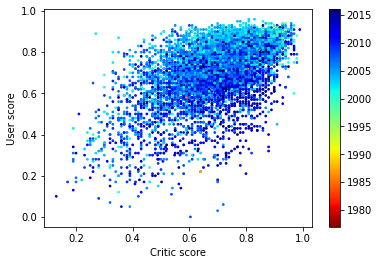

In [5]:
from common.scatter_plotter import ScatterPlotter
category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.User_Score, data[category_column])\
    .with_labels('Critic score', 'User score')\
    .with_color_bar()\
    .plot()

Sales per region considering Critic Score

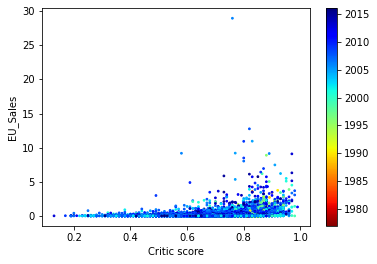

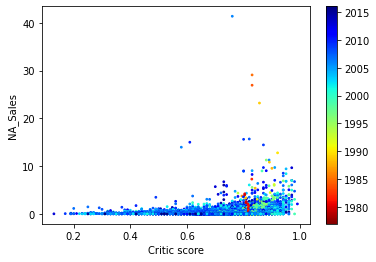

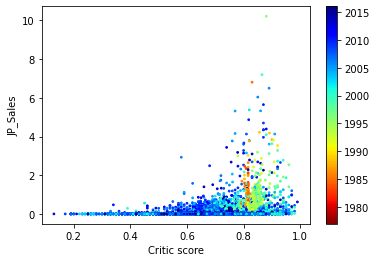

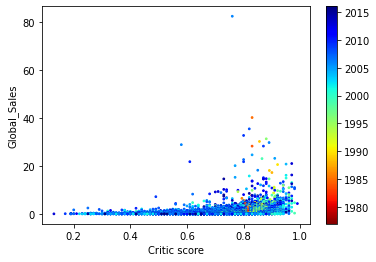

In [6]:
category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.EU_Sales, data[category_column])\
    .with_labels('Critic score', 'EU_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.NA_Sales, data[category_column])\
    .with_labels('Critic score', 'NA_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.JP_Sales, data[category_column])\
    .with_labels('Critic score', 'JP_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.Global_Sales, data[category_column])\
    .with_labels('Critic score', 'Global_Sales')\
    .with_color_bar()\
    .plot()

Sales per region considering User Score

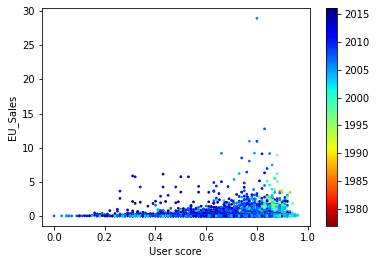

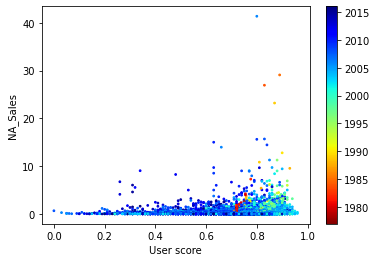

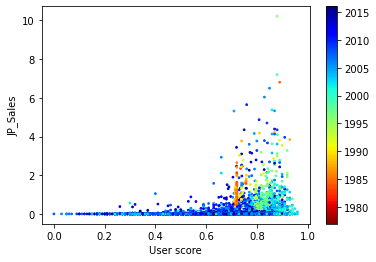

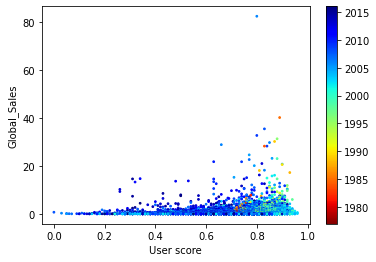

In [7]:
category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.EU_Sales, data[category_column])\
    .with_labels('User score', 'EU_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.NA_Sales, data[category_column])\
    .with_labels('User score', 'NA_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.JP_Sales, data[category_column])\
    .with_labels('User score', 'JP_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.Global_Sales, data[category_column])\
    .with_labels('User score', 'Global_Sales')\
    .with_color_bar()\
    .plot()

Outliers - 1D

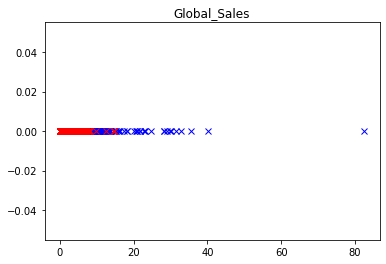

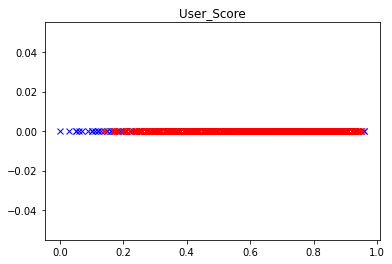

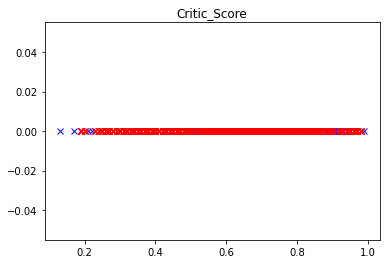

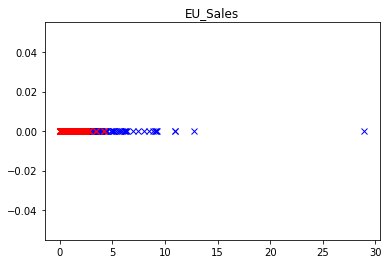

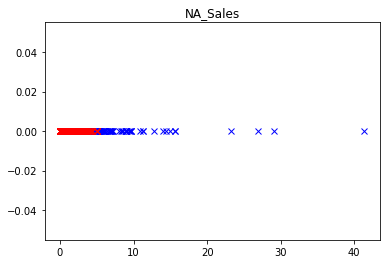

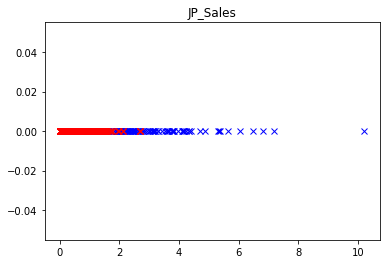

In [8]:
k_neighbours = 2
r_percentage = 0.01
nearest_neighbours_columns = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
for column in nearest_neighbours_columns:
    outliers_result = find_outliers_in_single_column(data, column, k_neighbours, r_percentage)
    outliers = outliers_result[0]
    non_outliers = outliers_result[1]

    plt.figure()
    plt.plot(outliers[column], np.zeros_like(outliers[column]), 'x', c='b')
    plt.plot(non_outliers[column], np.zeros_like(non_outliers[column]), 'x', c='r')
    plt.title(column)

Outliers - 2D
 - global sales vs critic score
 - global sales vs user score
 - user score vs critic score

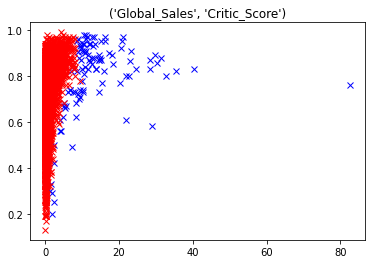

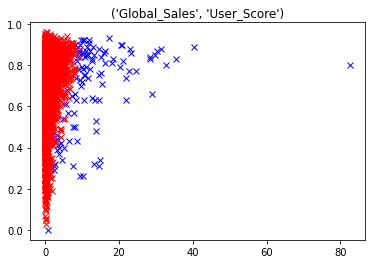

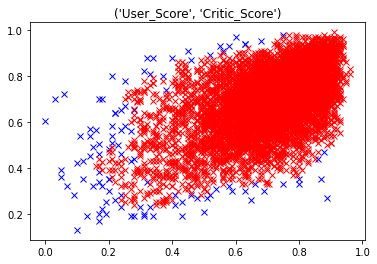

In [13]:
k_neighbours = 5
r_percentage = 0.01
nearest_neighbours_columns = [("Global_Sales", "Critic_Score"),
                              ("Global_Sales", "User_Score"),
                              ("User_Score", "Critic_Score")]
for column_pair in nearest_neighbours_columns:
    outliers_result = find_outliers_in_two_columns(data, column_pair, k_neighbours, r_percentage)
    outliers = outliers_result[0]
    non_outliers = outliers_result[1]

    plt.figure()
    plt.plot(outliers[column_pair[0]], outliers[column_pair[1]], 'x', c='b')
    plt.plot(non_outliers[column_pair[0]], non_outliers[column_pair[1]], 'x', c='r')
    plt.title(column_pair)